In [2]:
rm(list=ls())
getwd()
dir='/Users/sungjinpark/OneDrive - konkuk.ac.kr/datamining/appstore_2/1preprocessing'
setwd(dir)

[1] "/Users/sungjinpark/OneDrive - konkuk.ac.kr/datamining/appstore_2/1preprocessing"

# 1. 원본 데이터 load

In [3]:
load('appstore.rda')

## 1.1 불필요한 변수 삭제

In [4]:
# X, id, track_name, vpp_lic delete
drops <- c("vpp_lic","X","id",'track_name')
data=data[ , !(names(data) %in% drops)]

In [6]:
#install.packages("ggplot2")
#install.packages("standardize")
#install.packages("dplyr")
library(ggplot2)#시각화
library(scales) #시각화
library(dplyr) # 전처리
library(stringr)
library(tidyr)
library(descr)


# 2. Categorical 변수 전처리 

## 2.1 cont_rating(콘텐츠 등급)

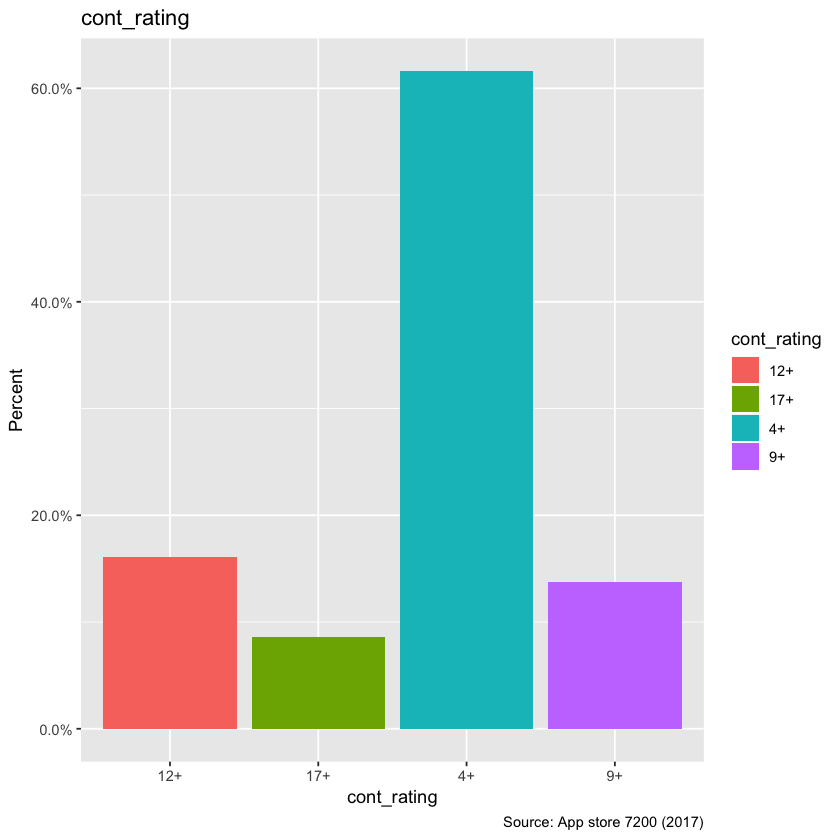

In [7]:
ggplot(data, aes(x = factor(cont_rating),
                      fill = factor(cont_rating))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=percent_format()) +
  labs(title="cont_rating", 
       caption="Source: App store 7200 (2017)",
       x="cont_rating",y = 'Percent',
       fill="cont_rating")

## 2.2 currency(화폐) -> 삭제

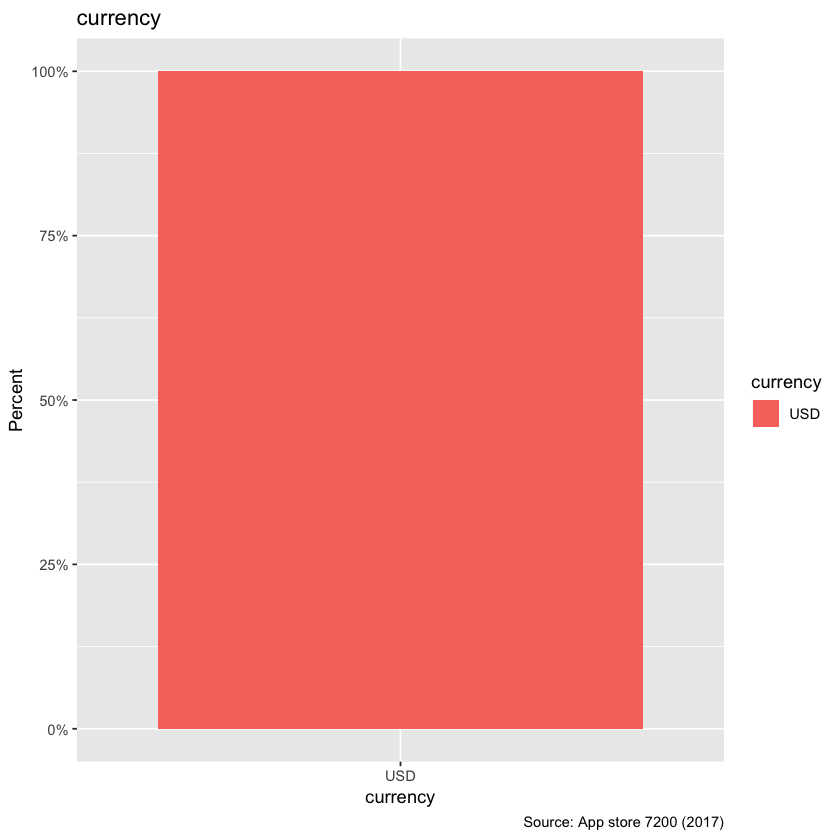

In [8]:
ggplot(data, aes(x = factor(currency),
                      fill = factor(currency))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=percent_format()) +
  labs(title="currency", 
       caption="Source: App store 7200 (2017)",
       x="currency",y = 'Percent',
       fill="currency")

In [9]:
# currency has only one level = USD -> Drop
drops <- c("currency")
data<-data[ , !(names(data) %in% drops)]


## 2.2 ver(버젼)

In [10]:
length(unique(data$ver))

[1] 1590

### 카테고리수가 1590가 되어 시각화 불가능 
### 메인버전 기준으로 전처리 실행

In [11]:
# version column preprocessing
ver.df<-as.data.frame(table(data$ver))
colnames(ver.df)<-c('ver','freg')
# split by ' . '
ver1.df=data %>%separate(ver, c(("mainver"),("sub_ver"), "."))
ver1.df$len=nchar(ver1.df$mainver)

# over len of mainver 3 drop
data$ver = ver1.df$mainver
data$ver_len=ver1.df$len
data=subset(data,!(data$ver_len>=3))


drops <- c("ver_len")
data<-data[ , !(names(data) %in% drops)]



# post processing
#which(data$ver=='v1')
#data[4105,]$ver
data[4105,]$ver = '1'

#which(data$ver=='v2')
#data[1127,]$ver
data[1127,]$ver = '2'
#data[3211,]$ver
data[3211,]$ver = '2'

#which(data$ver=='v3')
#data[3080,]$ver
data[3080,]$ver = '3'

#which(data$ver=='V3')
#data[3654,]$ver
data[3654,]$ver = '3'

#which(data$ver=="00")
#data[5171,]$ver
data[5161,]$ver = '0'

#which(data$ver=='01')
#data[2406,]$ver
data[2406,]$ver='0'
#data[2944,]$ver
data[2944,]$ver = '0'
#data[5071,]$ver
data[5071,]$ver = '0'

data$ver=as.numeric(data$ver)
data$ver=as.ordered(data$ver)

Warning message:
“Expected 3 pieces. Additional pieces discarded in 33 rows [56, 225, 262, 413, 476, 533, 625, 728, 787, 873, 886, 980, 1204, 1260, 1340, 1395, 1869, 1876, 2132, 2389, ...].”Warning message:
“Expected 3 pieces. Missing pieces filled with `NA` in 2768 rows [6, 13, 16, 17, 21, 23, 32, 33, 35, 37, 39, 44, 50, 54, 58, 59, 68, 70, 72, 75, ...].”

In [12]:
length(unique(data$ver))

[1] 37

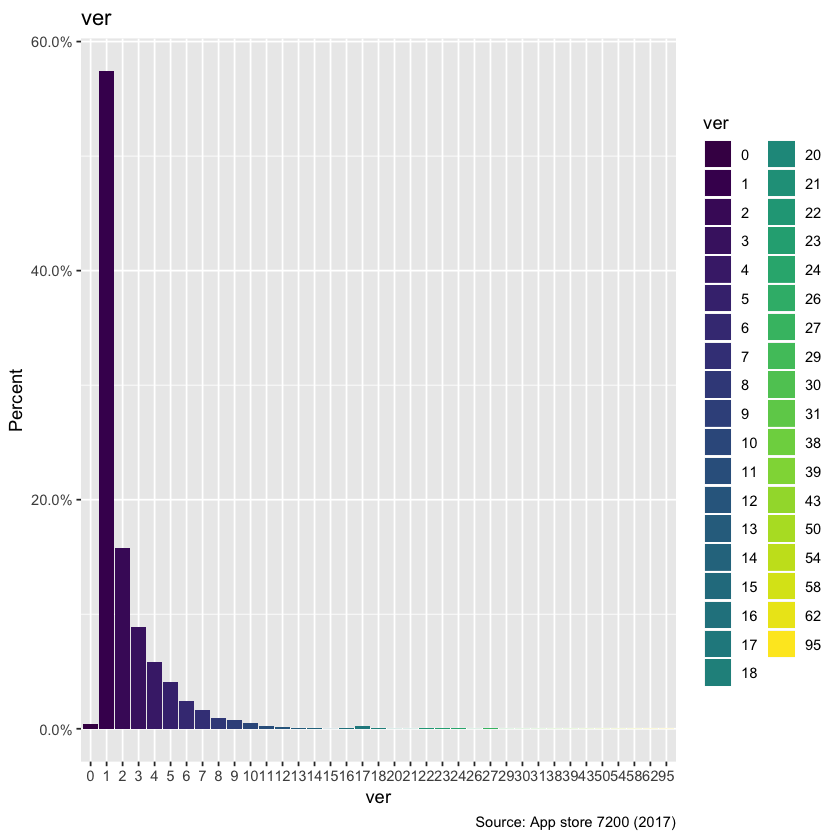

In [13]:
ggplot(data, aes(x = factor(ver),
                      fill = factor(ver))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=percent_format()) +
  labs(title="ver", 
       caption="Source: App store 7200 (2017)",
       x="ver",y = 'Percent',
       fill="ver")

### 메인버전만 가져왔어도, 37개의 카테고리

### 또한, ver 1은 57%

### 추가 전처리

In [14]:
ver.df<-as.data.frame(table(data$ver))
colnames(ver.df)<-c('ver','freg')


# ver relevel   0 : 1 
data$ver[data$ver==0] <- 0
data$ver[data$ver==1] <- 0
data$ver[data$ver!=0] <- 1

ver.df<-as.data.frame(table(data$ver))
colnames(ver.df)<-c('ver','freg')

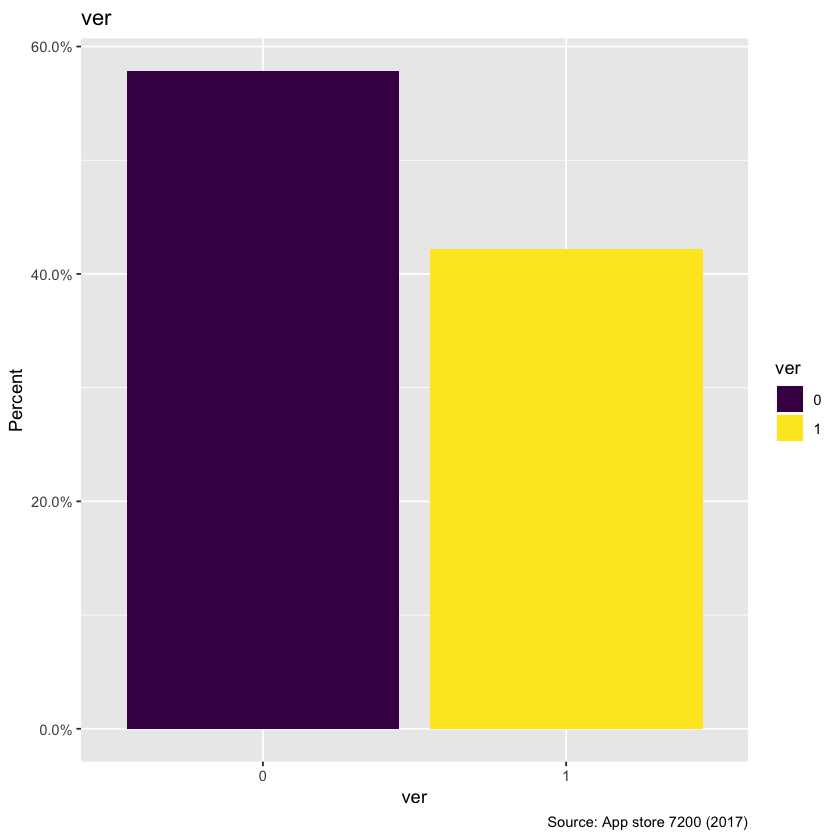

In [15]:
ggplot(data, aes(x = factor(ver),
                      fill = factor(ver))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=percent_format()) +
  labs(title="ver", 
       caption="Source: App store 7200 (2017)",
       x="ver",y = 'Percent',
       fill="ver")

## 2.3 prime_genre(장르)

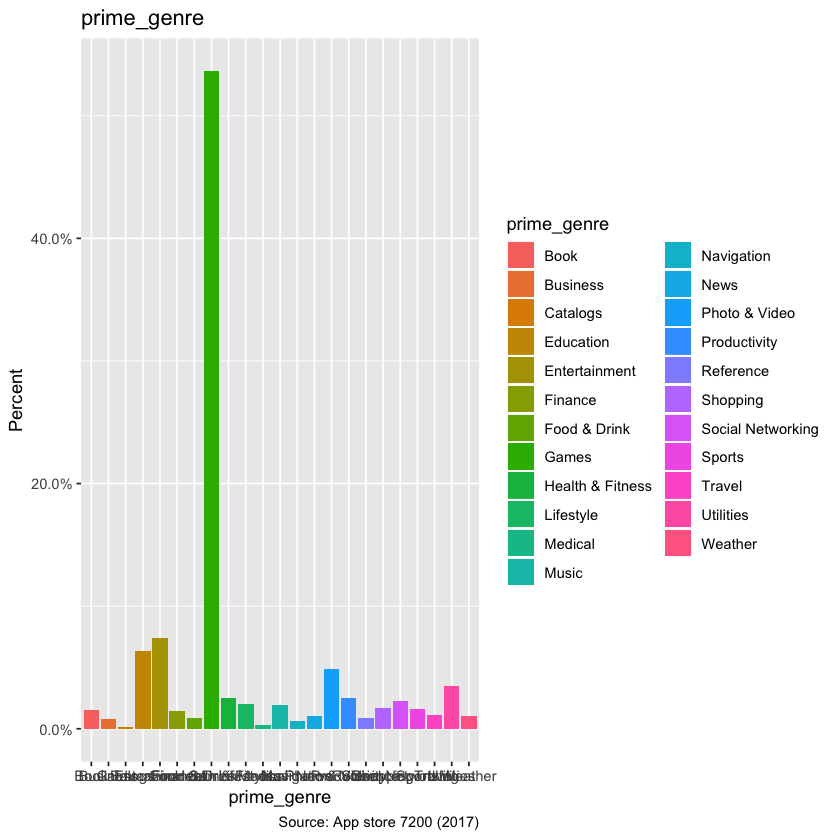

In [16]:
ggplot(data, aes(x = factor(prime_genre),
                      fill = factor(prime_genre))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=percent_format()) +
  labs(title="prime_genre", 
       caption="Source: App store 7200 (2017)",
       x="prime_genre",y = 'Percent',
       fill="prime_genre")

### game 카테고리가 50%를 넘어서 전처리 진행


## new_data1: game vs non_game

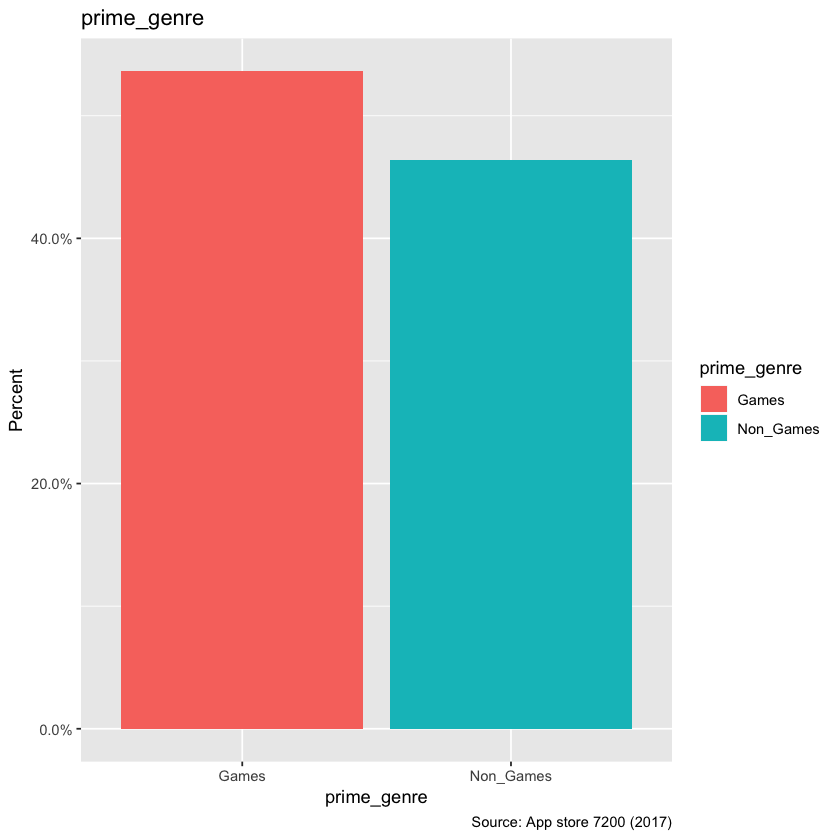

In [17]:
##########################
# prime_genre -> type 1 : game vs nongame
#             -> type 2 : upper 5 categories and etc                
##########################
prime_genre.df<-as.data.frame(table(data$prime_genre))

new_data1=data

levels(new_data1$prime_genre) <- c(levels(new_data1$prime_genre), "Non_Games") 
new_data1$prime_genre[new_data1$prime_genre=="Games"] <- "Games"
new_data1$prime_genre[new_data1$prime_genre!="Games"] <- "Non_Games"


ggplot(new_data1, aes(x = factor(prime_genre),
                      fill = factor(prime_genre))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=percent_format()) +
  labs(title="prime_genre", 
       caption="Source: App store 7200 (2017)",
       x="prime_genre",y = 'Percent',
       fill="prime_genre")

## new_data2 : Games, Entertainment, Education,..., Etc

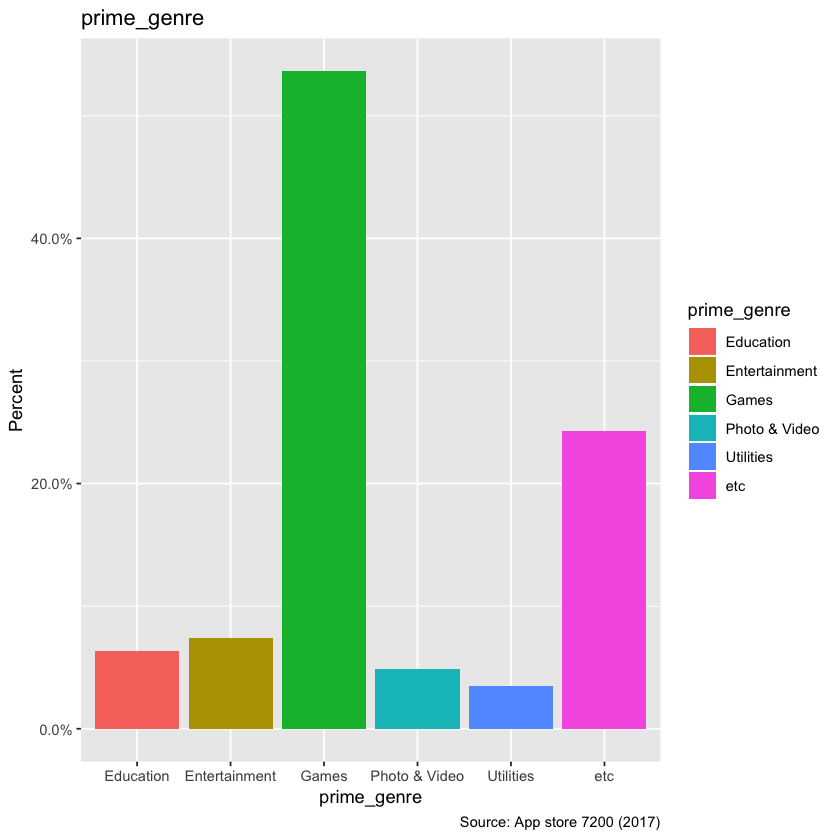

In [18]:
new_data2=data
main_genre=c("Games","Entertainment","Education","Photo & Video","Utilities")
levels(new_data2$prime_genre) <- c(levels(new_data1$prime_genre), "etc") 

# not in operator
'%!in%' <- function(x,y)!('%in%'(x,y))
new_data2$prime_genre[new_data2$prime_genre %!in% main_genre] <- "etc"

#str(new_data1)
#str(new_data2)
new_data1 <- droplevels(new_data1)    
new_data2 <- droplevels(new_data2)
#str(new_data1)
#str(new_data2)
################

ggplot(new_data2, aes(x = factor(prime_genre),
                      fill = factor(prime_genre))) +
  geom_bar(aes(y = (..count..)/sum(..count..))) + 
  scale_y_continuous(labels=percent_format()) +
  labs(title="prime_genre", 
       caption="Source: App store 7200 (2017)",
       x="prime_genre",y = 'Percent',
       fill="prime_genre")

In [19]:
save(new_data1, file ='game_nongame.rda') # game_Nongame
save(new_data2, file ='game_etc.rda') # game_etc